First 5 rows:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           N

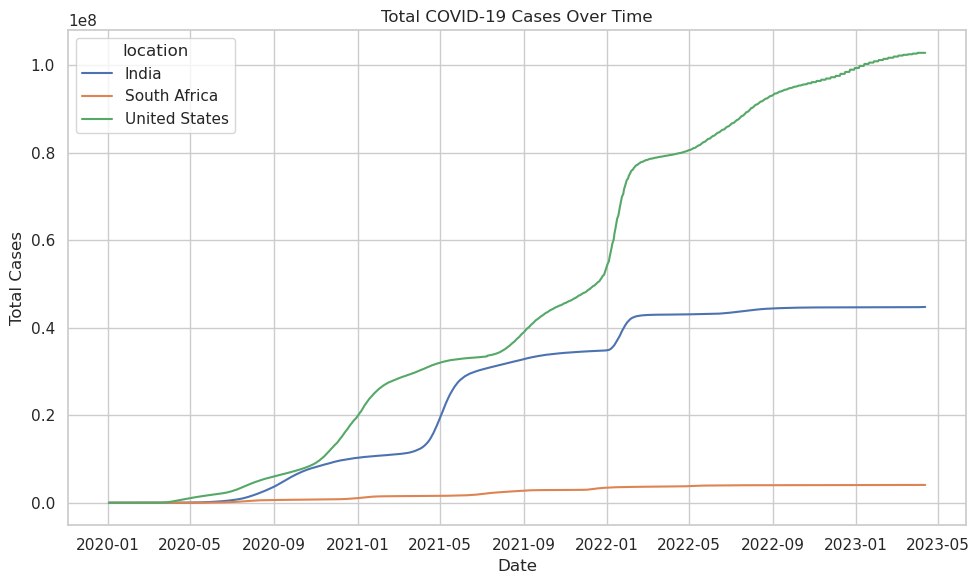

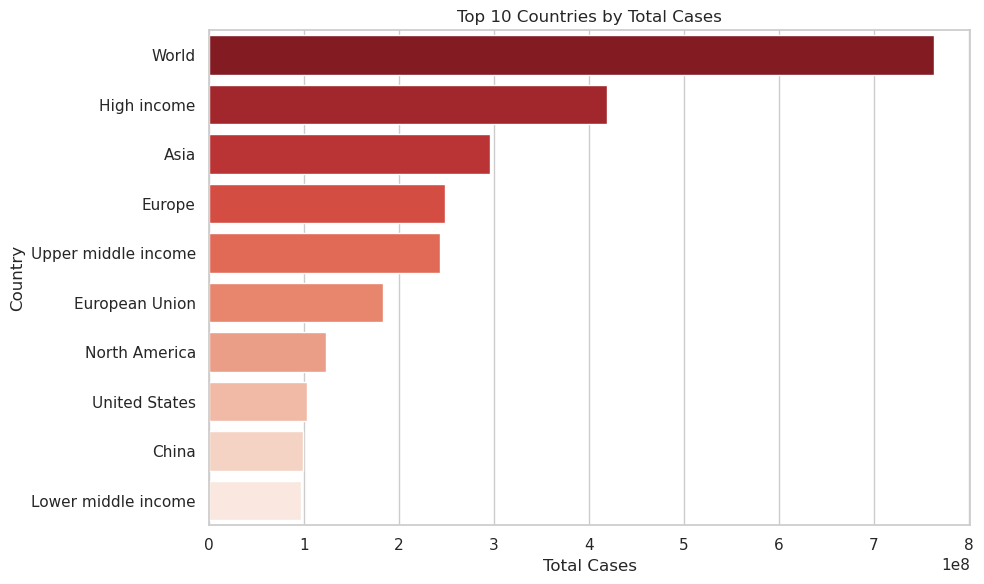

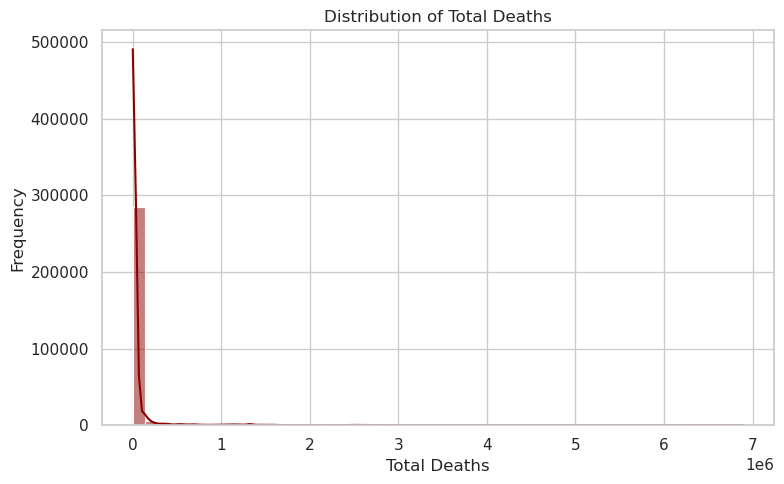

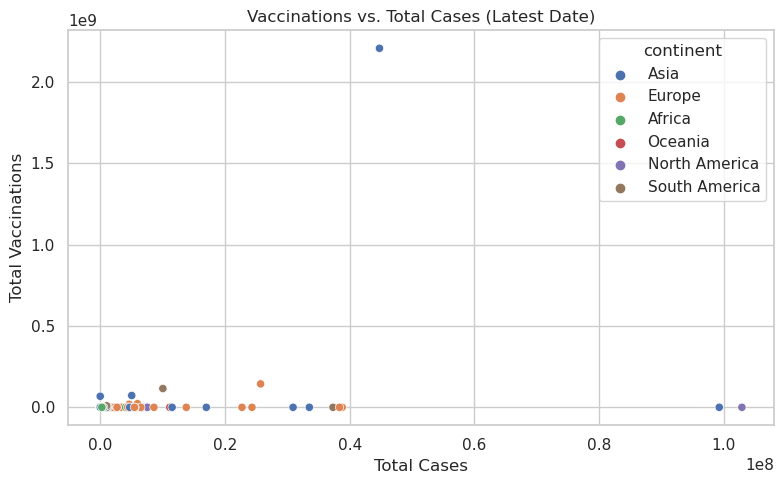

In [3]:
# COVID-19 Global Data Tracker – Full Python Code (Tasks 1 to 3)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------
# Task 1: Load and Explore the Dataset
# ----------------------------------
try:
    # Load the dataset
    covid_df = pd.read_csv("owid-covid-data.csv")  # Make sure this file is in your folder

    # Preview the first few rows
    print("First 5 rows:")
    print(covid_df.head())

    # Explore structure
    print("\n Dataset Info:")
    print(covid_df.info())

    # Missing values summary
    print("\n Missing Values (top 10 columns):")
    print(covid_df.isnull().sum().sort_values(ascending=False).head(10))

    # Drop rows with missing location or date
    covid_df_cleaned = covid_df.dropna(subset=['date', 'location'])

    # Convert date column to datetime
    covid_df_cleaned['date'] = pd.to_datetime(covid_df_cleaned['date'])

    # Fill numeric missing values with 0 (or use interpolate() for time-series)
    numeric_cols = covid_df_cleaned.select_dtypes(include='number').columns
    covid_df_cleaned[numeric_cols] = covid_df_cleaned[numeric_cols].fillna(0)

    print(f"\n Cleaned dataset shape: {covid_df_cleaned.shape}")

except Exception as e:
    print("Error during loading or cleaning:", e)

# ----------------------------------
# Task 2: Basic Data Analysis
# ----------------------------------
try:
    # Describe key stats
    print("\n Summary Statistics (Cases, Deaths, Vaccinations):")
    print(covid_df_cleaned[['total_cases', 'total_deaths', 'total_vaccinations']].describe())

    # Group by continent and get mean total cases
    if 'continent' in covid_df_cleaned.columns:
        print("\n Mean Total Cases by Continent:")
        print(covid_df_cleaned.groupby('continent')['total_cases'].mean().sort_values(ascending=False))
    else:
        print(" 'continent' column not found.")

    # Top 10 countries by total cases (latest date only)
    latest_date = covid_df_cleaned['date'].max()
    latest_data = covid_df_cleaned[covid_df_cleaned['date'] == latest_date]
    top_countries = latest_data[['location', 'total_cases']].sort_values(by='total_cases', ascending=False).head(10)
    print("\n Top 10 Countries by Total Cases (Latest Date):")
    print(top_countries)

except Exception as e:
    print("Error during analysis:", e)

# ----------------------------------
# Task 3: Data Visualization
# ----------------------------------
try:
    sns.set(style="whitegrid")

    # Filter for selected countries
    selected = ['United States', 'India', 'South Africa']
    subset = covid_df_cleaned[covid_df_cleaned['location'].isin(selected)]

    # Line Chart: Total cases over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=subset, x='date', y='total_cases', hue='location')
    plt.title('Total COVID-19 Cases Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.tight_layout()
    plt.show()

    # Bar Chart: Total cases by top 10 countries
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_countries, x='total_cases', y='location', palette='Reds_r')
    plt.title('Top 10 Countries by Total Cases')
    plt.xlabel('Total Cases')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()

    # Histogram: Distribution of total deaths
    plt.figure(figsize=(8, 5))
    sns.histplot(covid_df_cleaned['total_deaths'], bins=50, kde=True, color='darkred')
    plt.title('Distribution of Total Deaths')
    plt.xlabel('Total Deaths')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Scatter Plot: Total vaccinations vs. total cases
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=latest_data, x='total_cases', y='total_vaccinations', hue='continent')
    plt.title('Vaccinations vs. Total Cases (Latest Date)')
    plt.xlabel('Total Cases')
    plt.ylabel('Total Vaccinations')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error during visualization:", e)